In [1]:
#pip3 install cfgrib
import xarray as xr

In [37]:
ds = xr.open_dataset("adaptor.mars.external-1710242728.988267-1885-1-8ab0789e-ae35-45a6-995c-9c9d0beef229.grib", engine='cfgrib')

# Print information about the dataset
print(ds)

# Get the number of entries
num_entries = len(ds)

print(f"The GRIB file has {num_entries} entries.")


ds.close()


<xarray.Dataset> Size: 16MB
Dimensions:    (number: 10, time: 61, values: 914)
Coordinates:
  * number     (number) int64 80B 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 488B 2022-06-01T12:00:00 ... 2022-07-31T...
    surface    float64 8B ...
    latitude   (values) float64 7kB ...
    longitude  (values) float64 7kB ...
Dimensions without coordinates: values
Data variables:
    fbupinx    (number, time, values) float32 2MB ...
    drtcode    (number, time, values) float32 2MB ...
    dufmcode   (number, time, values) float32 2MB ...
    ffmcode    (number, time, values) float32 2MB ...
    fdsrte     (number, time, values) float32 2MB ...
    fwinx      (number, time, values) float32 2MB ...
    infsinx    (number, time, values) float32 2MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    in

In [38]:
latitudes = ds.latitude.values
ds['longitude'] = (ds.longitude + 180) % 360 - 180
longitudes = ds.longitude.values

print(f"Latitude: {latitudes[0]}")
print(len(latitudes))
print(f"Longitude: {longitudes[0]}")

Latitude: 42.40243242911061
914
Longitude: -31.680000000000007


In [39]:
data = ds.time.values
print(data)

['2022-06-01T12:00:00.000000000' '2022-06-02T12:00:00.000000000'
 '2022-06-03T12:00:00.000000000' '2022-06-04T12:00:00.000000000'
 '2022-06-05T12:00:00.000000000' '2022-06-06T12:00:00.000000000'
 '2022-06-07T12:00:00.000000000' '2022-06-08T12:00:00.000000000'
 '2022-06-09T12:00:00.000000000' '2022-06-10T12:00:00.000000000'
 '2022-06-11T12:00:00.000000000' '2022-06-12T12:00:00.000000000'
 '2022-06-13T12:00:00.000000000' '2022-06-14T12:00:00.000000000'
 '2022-06-15T12:00:00.000000000' '2022-06-16T12:00:00.000000000'
 '2022-06-17T12:00:00.000000000' '2022-06-18T12:00:00.000000000'
 '2022-06-19T12:00:00.000000000' '2022-06-20T12:00:00.000000000'
 '2022-06-21T12:00:00.000000000' '2022-06-22T12:00:00.000000000'
 '2022-06-23T12:00:00.000000000' '2022-06-24T12:00:00.000000000'
 '2022-06-25T12:00:00.000000000' '2022-06-26T12:00:00.000000000'
 '2022-06-27T12:00:00.000000000' '2022-06-28T12:00:00.000000000'
 '2022-06-29T12:00:00.000000000' '2022-06-30T12:00:00.000000000'
 '2022-07-01T12:00:00.000

In [40]:
import math
def DistanceTwoPoints(lat1, lon1, lat2, lon2):
    R = 6371e3  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in meters

def find_nearest(lat, lon, latitudes, longitudes):
    min_distance = None
    nearest_point = None

    for lat2, lon2 in zip(latitudes, longitudes):
        distance = DistanceTwoPoints(lat, lon, lat2, lon2)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            nearest_point = (lat2, lon2)

    return min_distance, nearest_point

In [41]:
#40.20875,-7.36260499954224
#40.1394270001517,-7.50764199998644
LATITUDE_SING = 40.1394270001517
LONGITUDE_SING = -7.50764199998644


min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, latitudes, longitudes)

In [42]:
print(min_distance, nearest_point)

19358.687941512144 (40.15594741204222, -7.734375)


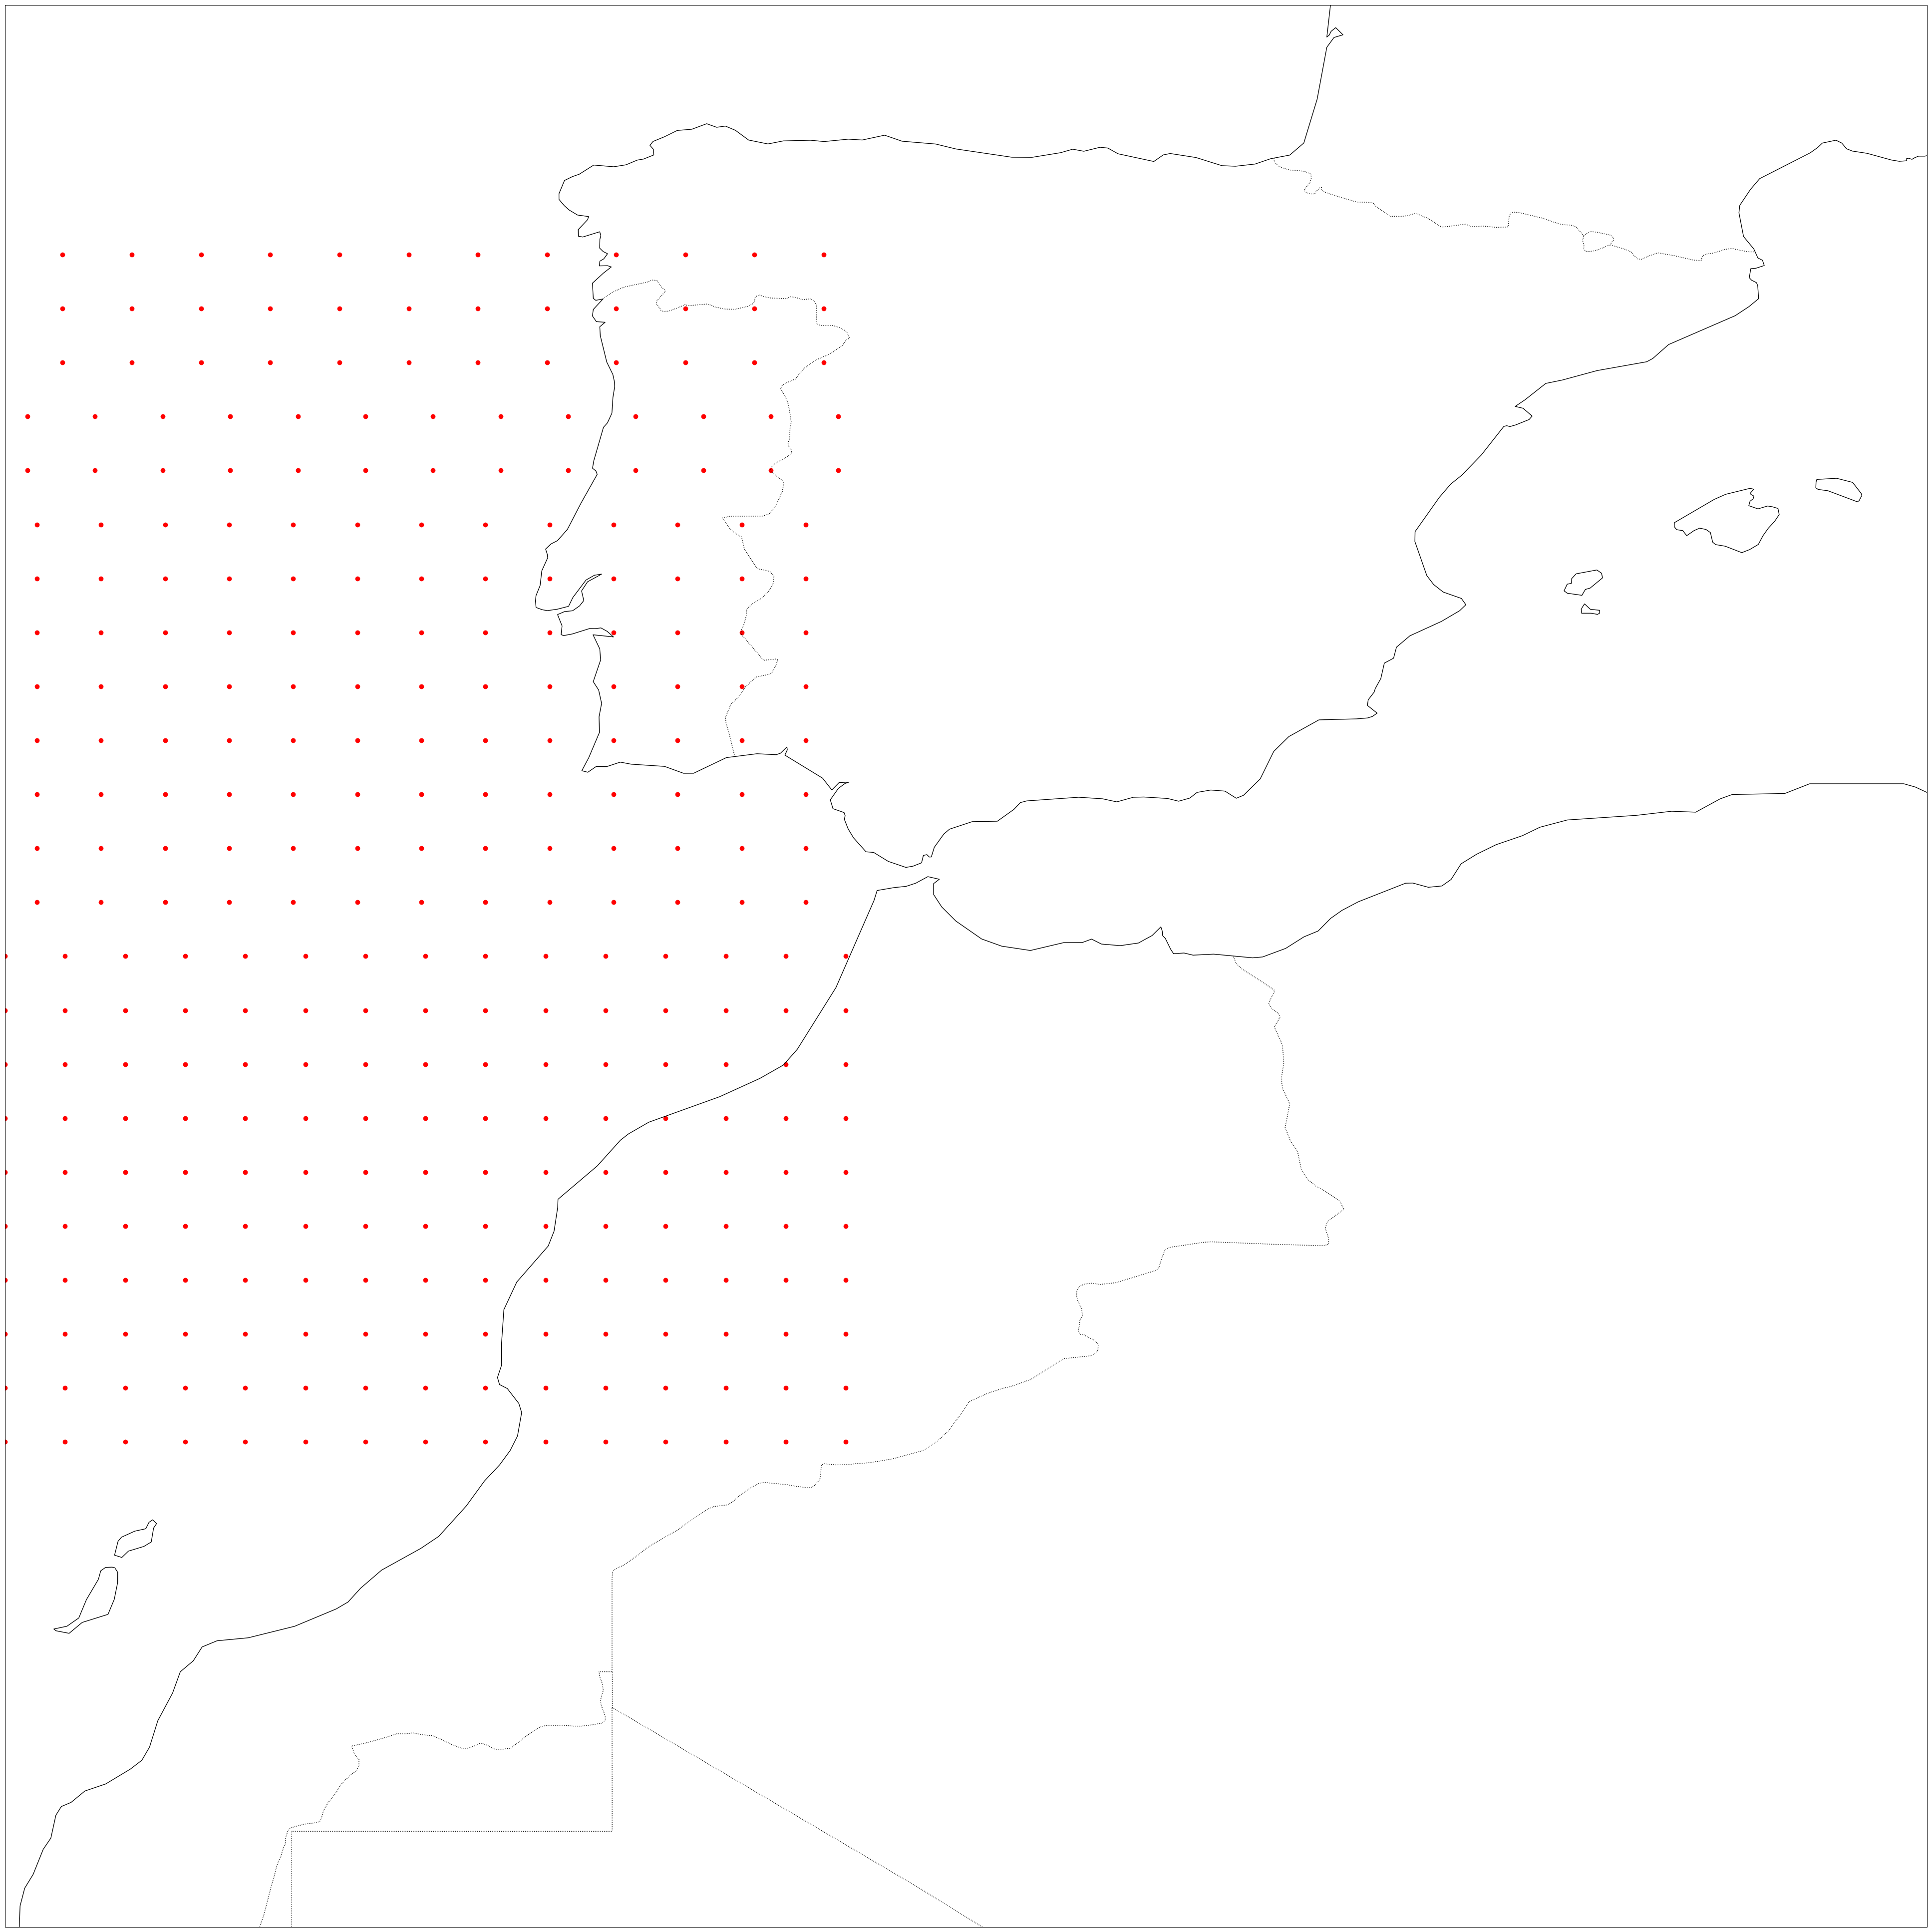

In [43]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map centered around the Iberian Peninsula
fig, ax = plt.subplots(figsize=(50, 50), subplot_kw=dict(projection=ccrs.PlateCarree()))

#[longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([-15, 5, 25, 45])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the points on the map
plt.scatter(longitudes, latitudes, color='red', transform=ccrs.PlateCarree())

plt.savefig('map2.png', dpi=300)

plt.show()